# **Problem**

**A chain of hotels, INN Hotels Group, is facing a problem of inventory loss due to booking cancellations, resulting in revenue loss. They want your help to build an AI solution that will help them predict the likelihood of a booking getting cancelled so that they can take measures to fill in potential vacancies.**

# **Business Context and Problem Definition**

## Business Context

With the increasing popularity and ease-of-access of online hotel booking platforms, customers tend to make reservations in advance to avoid any last minute rush and higher prices. These online platforms offer flexible cancellation options, in some cases even a day before reservation. To compete with this, even offline bookings have increased the flexibility in cancellations. This has led to an increase in the growing number of cancellations, with one of the primary reasons being last-minute changes in travel plans. These sudden changes can result from unforeseen circumstances, such as personal emergencies, flight delays, or unexpected events at the travel destination.

Hotel booking cancellations becomes a crucial problem to solve as it leads to revenue loss and operational inefficiencies. The cancellation of bookings impacts a hotel on various fronts:

1. Loss of revenue when the hotel cannot resell the room

2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms

3. Lowering prices last minute, so the hotel can resell a room, resulting in reduced profit margins

## Problem Definition

The INN Hotels Group have been contending with the challenge of rising cancellations for nearly a year now. However, the last three months seeing a **rise of inventory loss due to cancellation rise to an all-time high of 18%**. This has led to a jump in the **revenue loss to an all-time high of approx. \$0.25 million annually**. This has significantly impacted their profit margins.

- In the current context, inventory refers to a hotel room, and the inability to sell one leads to inventory loss

The group has been using heuristic mechanisms (rule and domain expert based) to try and reduce the revenue loss due to cancellations, but this hasn't been effective so far hasn't been effective (neither efficient nor scalable), as evident from the magnitude of losses they are incurring.

The group has decided that they **need an AI-based solution to predict the likelihood of a booking being cancelled** as they expect it to be more effective than their current mechanism. They hope that this proactive approach will help them significantly **minimize revenue loss and improve operational efficiency**.


# **Data Gathering**


**The data needed for buidling any AI solution is usually obtained from multiple sources.**

In the current scenario, we have the following sources:

1. **Website Data**: This includes information such as website traffic, user interactions, clickstream data, user demographics, and browsing behavior.

2. **Property Data**: This includes information such as the number of rooms, type of rooms (e.g., single, double, suite), facilities provided (e.g., Wi-Fi, parking, swimming pool), amenities, location details, and any additional property-specific attributes.

3. **Agencies Data**: This comprises reservation details (e.g., check-in and check-out dates, booking ID), guest profile information (e.g., name, contact details, preferences), cancellation requests, room prices, payment information, and any other relevant data related to the interactions between the property and booking agencies or platforms.

4. **Surveys and Feedbacks**: This refers to data obtained through customer surveys, feedback forms, and online reviews, which provide insights into customer satisfaction, preferences, and suggestions for improvement.

5. **Social Media**: This encompasses data collected from various social media platforms such as Facebook, Twitter, Instagram, and LinkedIn, including user posts, comments, likes, shares, and other interactions.

The data from different sources are collected and stored in an organized and secure manner in databases. Databases are made up of tables, which are collections of data organized into rows and columns. The rows represent individual records, and the columns represent the different attributes that make up each record. For example, a table of customer records might have columns for the customer's name, address, phone number, email address, and more.

Once the data is stored in the databases, we can extract necessary data in multiple ways.

1. **Export as CSV/Excel File**: This method allows for exporting a selected subset or the entire dataset in a CSV (Comma-Separated Values) or Excel file format, which can be easily opened and analyzed using spreadsheet software or using programming languages like Python.

2. **Querying from the database**: This involves running SQL (Structured Query Language) queries on the database to retrieve specific data based on predefined conditions, allowing for more targeted and customized data extraction for analysis or reporting purposes. The SQL queries can be executed using programming languages like Python by establishing a connection to the database.

#### **For the scope of this session, we are going to export a sample of the entire data to showcase the end-to-end solution.**
- The sample data was obtained by taking specific attributes from website data, agencies data, and property data and collating them together
- **We'll load the data sample into a Python notebook for illustration.**


## Importing the necessary libraries

In [ ]:
# @title Default title text
# installing the library for deploying AI models
!pip install gradio

In [ ]:
# libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# removing the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# setting the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 2 decimal points
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# library to split data
from sklearn.model_selection import train_test_split

# library to build AI model
from sklearn.tree import DecisionTreeClassifier

# library to tune AI model
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# libraries to evaluate the AI model
from sklearn.metrics import f1_score, make_scorer

# libraries to deploy the AI model
import os
import joblib
import gradio as gr

## Loading the dataset

In [ ]:
# # importing using Google Colab

# # connecting Google Drive to this Python notebook
# from google.colab import drive
# drive.mount('/content/drive')

# # defining the location where the data is stored
# path = "/content/drive/MyDrive/"
# # loading the data into a Pandas dataframe
# # hotel = pd.read_csv(path+"INNHotelsGroup.csv")

In [ ]:
# # importing using Jupyter Notebook

# # loading the data into a Pandas dataframe
hotel = pd.read_csv("INNHotelsGroup.csv")

In [ ]:
!pip install scipy==1.6.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 40.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scipy: filename=scipy-1.6.1-cp310-cp310-linux_x86_64.whl size=67155920 sha256=fcbc80d5200b358ebbfcc165b51257c095bf214bd3084ee50c2981f23134fde6
  Stored in directory: /root/.cache/pip/wheels/e6/2f/3f/66d8a5e5ac294c583511570222efe625930a65a5aa65ec4d50
Successfully built scipy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires scipy>=1.8.0, but you have scipy 1.6.1 which is incompatible.
gensim 4.3.1 requires scipy>=1.7.0, but you have scipy 1.6.1 which is incompati

In [ ]:
hotel.sample(10, random_state=10)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
18212,103,Offline,0,115.00,1,0,2018-04-19,0,2,Canceled
3267,86,Online,2,90.00,2,1,2018-11-04,0,2,Not_Canceled
28472,20,Online,1,92.67,2,1,2018-12-09,0,2,Not_Canceled
34178,22,Online,1,126.04,2,4,2018-12-28,0,10,Not_Canceled
35404,109,Online,4,105.21,2,2,2018-07-06,0,4,Not_Canceled
31551,30,Offline,0,127.15,1,0,2018-10-28,0,1,Not_Canceled
30927,192,Offline,0,100.00,2,0,2018-08-25,0,3,Not_Canceled
30473,278,Online,0,103.95,2,2,2018-07-16,1,1,Canceled
27445,0,Online,0,85.93,1,0,2018-05-12,0,1,Not_Canceled
33154,37,Online,1,92.31,1,4,2018-12-15,0,9,Canceled


# **Exploratory Data Analysis**


Suppose you want create car's design, you decide to analyze the data you have collected. Exploratory Data Analysis (EDA) is like examining the car's components and understanding their characteristics. In this stage, you explore the data to identify trends, patterns, and potential issues. For example, you analyze the historical maintenance records, customer feedback, and vehicle performance data to gain insights into common problems and customer preferences. By understanding this information, you can make informed decisions on how to enhance the car's design.

Exploratory Data Analysis (EDA) plays a very important role in an end-to-end AI solution. It enables

- **Understanding the Data**: EDA comprehensively reveals the dataset's structure, patterns, and issues. It assesses data quality, identifies missing values, outliers, and inconsistencies, vital for preprocessing and model development.
- **Identifying Data Patterns and Insights**: EDA discovers meaningful patterns, trends, and relationships through statistical techniques, visualizations, and summarization. It guides model development, hypothesis generation, and decision-making.
- **Feature Selection and Engineering**: EDA identifies relevant features by analyzing variable relationships, exploring correlations, and visualizing distributions. It improves model prediction by selecting informative features and creating new ones through feature engineering.

### EDA

In [ ]:
# creating a copy of the data to avoid any changes to original data
data = hotel.copy()

In [ ]:
# checking the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,36275.00,85.23,85.93,0.00,17.00,57.00,126.00,443.00
no_of_special_requests,36275.00,0.62,0.79,0.00,0.00,0.00,1.00,5.00
avg_price_per_room,36275.00,103.42,35.09,0.00,80.30,99.45,120.00,540.00
no_of_adults,36275.00,1.84,0.52,0.00,2.00,2.00,2.00,4.00
no_of_weekend_nights,36275.00,0.81,0.87,0.00,0.00,1.00,2.00,7.00
required_car_parking_space,36275.00,0.03,0.17,0.00,0.00,0.00,0.00,1.00
no_of_week_nights,36275.00,2.20,1.41,0.00,1.00,2.00,3.00,17.00


* The number of adults ranges from 0 to 4, which is usual.
* The range of the number of weeks and weekend nights seems fine. Though 7 weekends might be a very long stay.
* At least 75% of the customers do not require car parking space.
* On average the customers book 85 days in advance. There's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in this column.
* The average price per room is 103 euros. There's a huge difference between the 75th percentile and the maximum value which indicates there might be outliers present in this column.

In [ ]:
# defining a function to create a bar graph with percentage values

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=15,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    # increase the size of x-axis and y-axis scales
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

    # setting axis labels
    ax.set_xlabel(feature.replace('_', ' ').title(), fontsize=15)
    ax.set_ylabel('')

    # show the plot
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(loc="upper left", fontsize=12, bbox_to_anchor=(1, 1))

    # setting the formatting for x-axis
    plt.xticks(fontsize=15, rotation=0)
    plt.xlabel(predictor.replace('_', ' ').title(), fontsize=15)
    # setting the formatting for y-axis
    plt.yticks(fontsize=15)
    # show the plot
    plt.show()

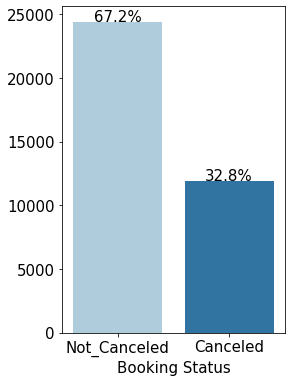

In [ ]:
# visualizing the number of cancelled bookings
labeled_barplot(data, "booking_status", perc=True)

- Approx. one-third of the bookings were canceled

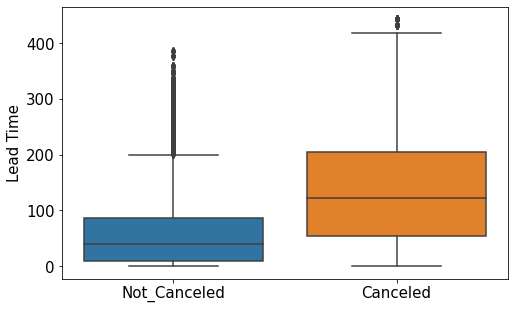

In [ ]:
# visualizing the relationship between lead time and booking cancellation
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="booking_status", y="lead_time")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Lead Time', fontsize=15);

- The higher the lead time, higher is the chances of cancellation

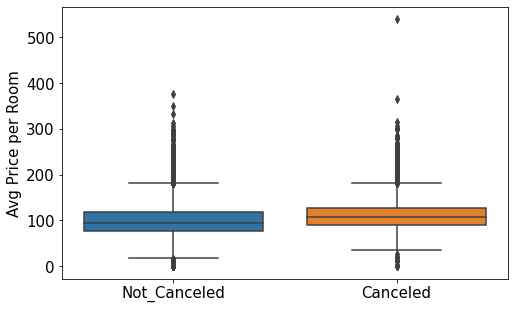

In [ ]:
# visualizing the relationship between avg room price and booking cancellation
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="booking_status", y="avg_price_per_room")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Avg Price per Room', fontsize=15);

- The booking status marginally varies with the average price per room

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
Offline                  3153          7375  10528
Online                   8732         17015  25747
All                     11885         24390  36275
------------------------------------------------------------------------------------------------------------------------


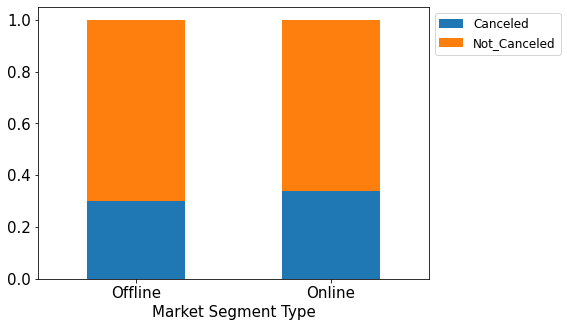

In [ ]:
stacked_barplot(data, "market_segment_type", "booking_status")

* Offline bookings have witnessed a slightly lower rate of cancellation compared to online bookings

In [ ]:
# converting the 'arrival_date' column to datetime type
data['arrival_date'] = pd.to_datetime(data['arrival_date'])

# extracting month from 'arrival_date'
data['arrival_month'] = data['arrival_date'].dt.month

In [ ]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count().to_frame().reset_index()
monthly_data.columns = ['Month', 'Bookings']
monthly_data

,Month,Bookings
0,1,1014
1,2,1704
2,3,2358
3,4,2736
4,5,2598
5,6,3203
6,7,2920
7,8,3813
8,9,4611
9,10,5317


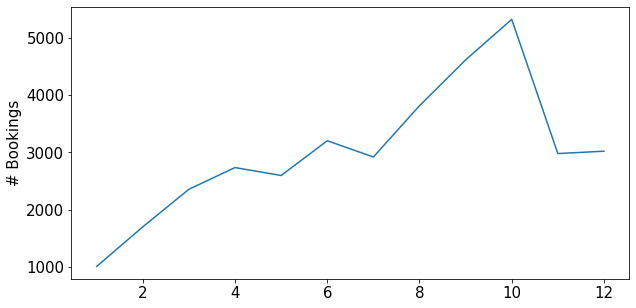

In [ ]:
# visualizing the trend of number of bookings across months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Bookings")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('# Bookings', fontsize=15);

* The trend shows that the number of bookings rise from January to April, remain consistent from April to July, then rise again till October where it reaches a peak, and then drops down again in November and December

booking_status  Canceled  Not_Canceled    All
arrival_month                                
1                     24           990   1014
2                    430          1274   1704
3                    700          1658   2358
4                    995          1741   2736
5                    948          1650   2598
6                   1291          1912   3203
7                   1314          1606   2920
8                   1488          2325   3813
9                   1538          3073   4611
10                  1880          3437   5317
11                   875          2105   2980
12                   402          2619   3021
All                11885         24390  36275
------------------------------------------------------------------------------------------------------------------------


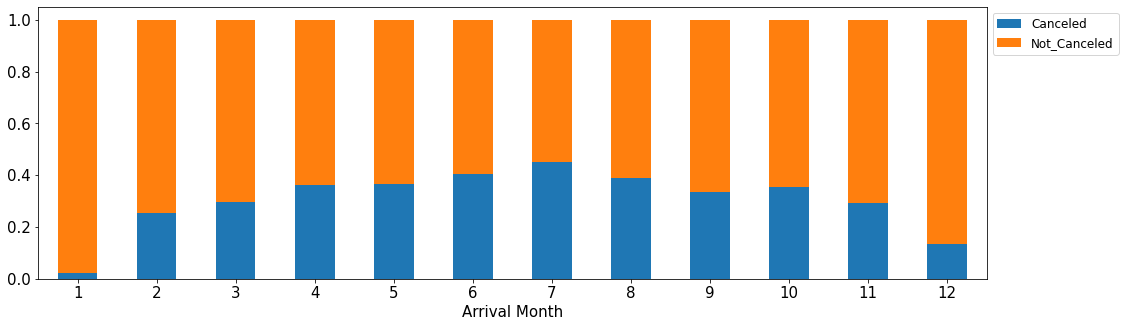

In [ ]:
##Let's check the percentage of bookings canceled in each month
stacked_barplot(data, "arrival_month", "booking_status")

* January and December witness a significantly lower rate of cancellation compared to the other months, and July witnesses the highest rate of cancellation

### EDA Summary

`Booking Status`


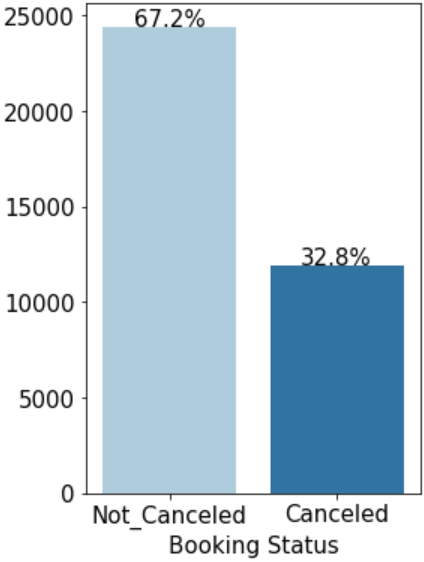



**Approx. one-third of the bookings were canceled**

`Lead Time Vs Booking Status`


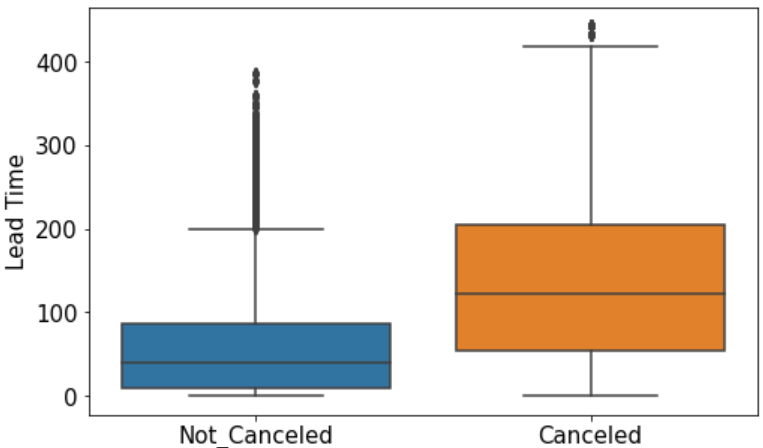

**The higher the lead time, higher is the chances of cancellation**

`Market Segment Type Vs Booking Status`

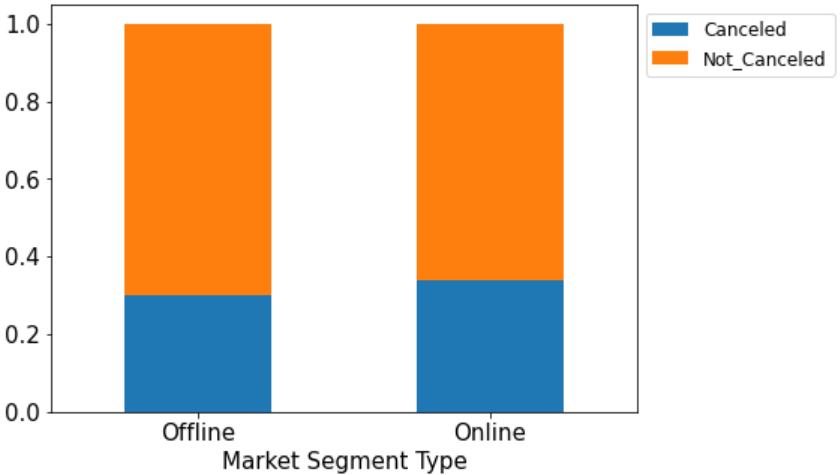

**The cancellation of bookings is independent of the mode of booking (online or offline)**

- Customers seem to behave similarly for both modes of booking, which might be due to flexible cancellation policy offered in either mode

`Arrival Month Vs Booking Status`

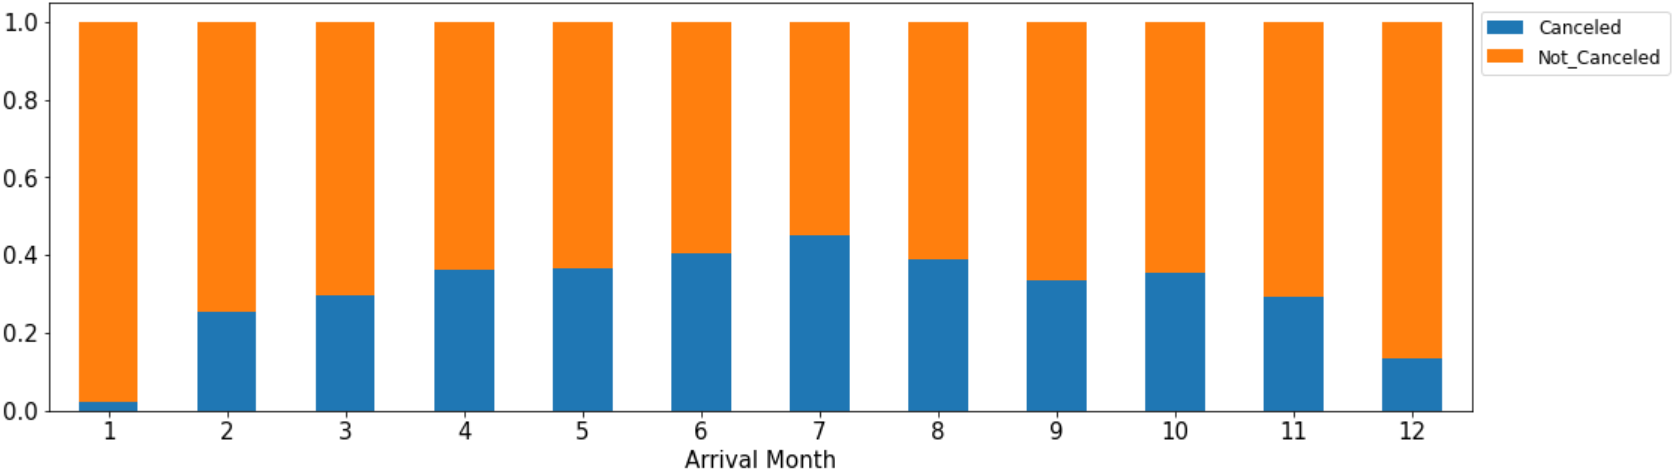

**January (\~2.5%) and December (\~10%) witness a significantly lower rate of cancellation compared to the other months (average \~30%), while July (~40%) witnesses the highest rate of cancellation**

We also noted the following based on the EDA conducted:

- **The booking status does not significantly vary with the average price per room**
- **The monthly booking trends show that the number of bookings rise from January to April, remain consistent from April to July, then rise again till October where it reaches a peak, and then drops down again in November and December**

We see that variables like lead time and arrival month have a fair amount of difference for cancelled and non-cancelled bookings, while some of the other variables like market segment and avg price per room do not. But we can only visualize the data in 2 or 3 dimensions, and there may be more complex relationships in the data beyond that which cannot be captured visually.

So, we need an AI models that can do the following:
  - Take the booking detail (customer arrival month, booking lead time, no. of guests, and more) as input
  - Learn the patterns in the input data
  - Fit a mathematical model using these patterns to identify which situations lead to booking cancellation
  - Predict the likelihood of cancellation of a new booking

# **Model Building**


**The AI model is the 'heart' of our AI solution.** The model serves as the core component that brings intelligence and functionality to an end-to-end AI solution. It leverages learned patterns and insights to generate predictions or perform tasks, enabling organizations to make data-driven decisions, automate processes, and unlock valuable insights from their data.

The model building step of an AI solution can be further broken down into the sub-steps shown below.

### **Data Preprocessing**

Now that you have a better understanding of the data, it's time to preprocess it to ensure it's in the right format for modeling. Data preprocessing is like preparing the car's components for assembly. In this stage, you clean the data by handling missing values, removing duplicates, and resolving inconsistencies.  In the car example, you would need to start by gathering all of the necessary parts. However, the parts might not all be the same size or shape. They might also be dirty or damaged. Before you could start building the car, you would need to clean and prepare the parts. This would involve removing any dirt or damage, and making sure that all of the parts are the same size and shape.

Data preprocessing is a crucial step as it enable the following.

- **Removing duplicate data**: If your data contains duplicate records, it can skew your results. For example, if you are trying to calculate the average sales of a product, and your data includes duplicate sales records, the average will be artificially inflated.

- **Correcting errors**: If your data contains errors, it can lead to inaccurate results. For example, if your data includes a product with a price of 1000, but the correct price is actually 100, your analysis will be inaccurate.

- **Filling in missing values**: If your data contains missing values, it can make it difficult to analyze. For example, if you are trying to calculate the average age of a group of people, and your data includes missing ages, you will not be able to calculate an accurate average.

- **Transforming the data**: Sometimes, it is necessary to transform the data into a different format in order to make it easier to analyze. For example, if your data is in the form of text, you may need to convert it into numbers in order to perform statistical analysis.

For the current scenario, we will be doing the following data preprocessing steps

 1. **We will encode the categorical variables using numerical values**

   - A computer can understand numbers and not text, so it is important to convert text to numbers

 2. **We will also divide the data into two parts - 70% of the data will be used for training purpose and the remaining 30% for testing purpose**
  - This is similar to examples vs exercises in a textbook
     - The examples are used to help a person understand the concepts better and it is important to ensure that the person performs well on these examples to learn well
     - The exercises are actually where the understanding is tested, and scores on exercises give a clearer picture of the level of understanding
  - If someone does well on both examples and exercises, we know that they have learnt well


## Data Preprocessing

In [ ]:
# encoding the output (also called target) attribute
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

In [ ]:
# separating the input and output variables
X = data.drop(["booking_status","arrival_date"], axis=1)
y = data["booking_status"]

# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)

# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
X.head()

,lead_time,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,arrival_month,market_segment_type_Online
0,224,0,65.00,2,1,0,2,10,0
1,5,1,106.68,2,2,0,3,11,1
2,1,0,60.00,1,2,0,1,2,1
3,211,0,100.00,2,0,0,2,5,1
4,48,0,94.50,2,1,0,1,4,1


## **Model Training and Evalution**

Model training is like determining how a car will operate. During this stage, you gather data and create a model that can make decisions based on that data. In the car example, you would collect information on how to accelerate, brake, and turn based on different conditions such as speed limits, road conditions, and traffic signals. The goal is to create a model that can learn from this data and make accurate decisions.

Training an AI model is important because it allows machines to learn and perform tasks without explicit programming. It enables the following:

- **Learning from Data**: AI models, such as machine learning and deep learning algorithms, learn patterns and make predictions based on data. Through training, the model can identify underlying patterns, correlations, and relationships in the data, enabling it to make accurate predictions or perform specific tasks.

- **Generalization and Adaptability**: By training an AI model on diverse and representative data, it can learn generalizable patterns and rules that can be applied to new, unseen data. A well-trained model can adapt and make accurate predictions or decisions on new data points it hasn't encountered before.

- **Optimization and Performance Improvement**: During the training process, AI models adjust their internal parameters and weights to minimize errors or maximize performance on the training data. Training allows models to fine-tune their internal mechanisms to achieve the best possible performance on the given task.

## Model Training and Evaluation

In [ ]:
# defining the AI model to build
model = DecisionTreeClassifier(random_state=1)

# training the AI model on the train data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

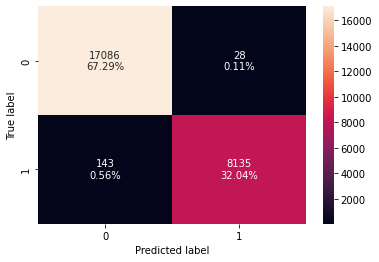

In [ ]:
# confusion matrix for train data
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
# evaluating the model performance on the train data
model_train_predictions = model.predict(X_train)
model_train_score = f1_score(y_train, model_train_predictions)

print("Model Score on Train Data:", np.round(100*model_train_score, 2))

Model Score on Train Data: 98.96


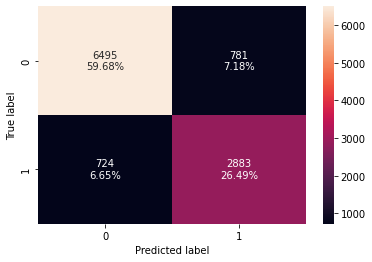

In [ ]:
# confusion matrix for test data
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
# evaluating the model performance on the test data
model_test_predictions = model.predict(X_test)
model_test_score = f1_score(y_test, model_test_predictions)

print("Model Score on Test Data:", np.round(100*model_test_score, 2))

Model Score on Test Data: 79.3


## Observations from Model Evaluation

Our AI model has a score of 99% on the train data and 79% on the test data respectively.

- This shows that while the model work really well on the data it is trained on, it fails to replicate the same performance on unseen data.

- This becomes a worry as the ultimate goal would be to make predictions for new reservations that have not come in yet, and we do not want a model that will fail to perform well on such unseen data.

## **Model Tuning**

Once you have determined the basic functionality of a car, it's time to fine-tune it for better performance. Model tuning is like adjusting the car's settings to optimize its behavior. In this stage, you make adjustments to the model parameters to improve its accuracy, efficiency, or other desired qualities. In the car example, you might tweak the engine, suspension, and other components to enhance its fuel efficiency, handling, or safety features. You wouldn't just fill up the tank with gas and go. You would adjust the tire pressure, check the oil level, and tune the engine. The same is true for machine learning models.

Model tuning is important for

- **Optimizing Performance**: Model tuning allows for finding the optimal configuration of hyperparameters to maximize the performance of the AI model. By systematically adjusting the hyperparameters, such as learning rate, regularization strength, or tree depth, it is possible to find the combination that yields the best results, improving the model's accuracy, precision, recall, or other performance metrics.

- **Determining the right fit**: Model tuning helps in finding the right set of model parameters that yield the best results. By tuning the model, it is possible to strike a balance and achieve an optimal level of complexity that  ensures that the model neither fails to capture the underlying patterns in the data nor learns the training data too well but fails to generalize to new data.

- **Adapting to Data Characteristics**: Model tuning allows for adapting the model to the specific characteristics of the data at hand. Different datasets may require different hyperparameter settings to achieve the best performance. By tuning the model, it becomes possible to adapt to data variations, handle different data distributions, or account for specific data properties, ultimately improving the model's ability to generalize and make accurate predictions.

## Model Tuning

In [ ]:
# choosing the type of AI model
dummy_model = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# defining the grid of parameters of the AI model to choose from
parameters = {
    "max_leaf_nodes": [150, 250],
    "min_samples_split": [10, 30],
}

# defining the model score on which we want to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# running the model tuning algorithm
grid_obj = GridSearchCV(dummy_model, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [ ]:
# selecting the best combination of parameters for the model to create a new model
tuned_model = grid_obj.best_estimator_

# training the new AI model
tuned_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=250,
                       min_samples_split=10, random_state=1)

In [ ]:
# evaluating the model performance on the train data
tuned_model_train_predictions = tuned_model.predict(X_train)
tuned_model_train_score = f1_score(y_train, tuned_model_train_predictions)

print("Model Score on Train Data:", np.round(100*tuned_model_train_score, 2))

Model Score on Train Data: 81.83


In [ ]:
# evaluating the model performance on the test data
tuned_model_test_predictions = tuned_model.predict(X_test)
tuned_model_test_score = f1_score(y_test, tuned_model_test_predictions)

print("Model Score on Test Data:", np.round(100*tuned_model_test_score, 2))

Model Score on Test Data: 80.2


- The train and test performances are much more similar now, so we can say that the model is able to generalize well

## **Model Testing**

After tuning the car, it's essential to test it thoroughly before using it in real-world situations. Model testing is like taking the car out for a test drive to ensure it performs as expected. In this stage, you simulate different scenarios and evaluate how well the model responds. For the car example, you would assess how the car handles various driving conditions, such as highways, urban roads, and off-road terrains. Testing helps identify any issues or weaknesses in the model that need to be addressed.

Model testing is important for:

- **Validating model performance**: Testing helps assess how well the model performs under various conditions and scenarios.

- **Identifying and mitigating errors or flaws**: Testing helps uncover any errors, bugs, or weaknesses in the model.

- **Assessing model robustness and generalizability**: Testing helps evaluate the model's performance on new, unseen data.

- **Building user trust and confidence**: Model testing instills trust in the model's capabilities and predictions.

## Model Testing

In [ ]:
final_model = tuned_model

In [ ]:
# evaluating the model performance on the test data
final_model_test_predictions = final_model.predict(X_test)
final_model_test_score = f1_score(y_test, final_model_test_predictions)

print("Model Score on Test Data:", np.round(100*final_model_test_score, 2))

Model Score on Test Data: 80.2


## Observations from Model Testing

- Our AI model has a score of ~80% on the test data, which is a good score.
- We can now move ahead to the next stage.

# **Model Deployment and Monitoring**

Once the car has been built and tested, it's time to put it into action. Model deployment is like launching a car for production and public use. In this stage, you expose the model and make it ready for making predictions and supporting decision-making.

Model deployment helps with the following:

- **Realizing Value**: Model deployment is necessary to derive value from the developed AI solution. By deploying the model into a production environment, businesses can leverage its capabilities to automate processes, make predictions, provide recommendations, or generate insights. Model deployment allows organizations to put their AI solution into action and start reaping the benefits.

- **Scalability and Efficiency**: Deploying a model enables scalability and efficiency in handling large volumes of data and making predictions or processing requests in real time. The model can be integrated into existing systems or applications, allowing for seamless and automated decision-making at scale. Deployment ensures that the AI solution can handle the demands of the operational environment effectively.

- **Continuous Learning and Improvement**: Model deployment facilitates the collection of real-world data, which can be used to monitor model performance and gather feedback. By continuously monitoring the model's output and gathering user feedback, organizations can iteratively improve the model, enhance its accuracy, and adapt it to changing conditions. Deployment allows for ongoing learning and refinement of the AI solution.

- **Business Impact and Decision Support**: Deployed models provide valuable insights and predictions that support decision-making processes. By integrating AI into business operations, organizations can leverage the model's outputs to make informed decisions, optimize processes, improve customer experiences, and gain a competitive edge. Model deployment enables the practical utilization of AI for generating business impact.

## Model Deployment

In [ ]:
# exporting the final model to the disk
joblib.dump(final_model, 'hotel_cancellation_prediction_model_v1_0.joblib')

In [ ]:
# loading the final model from the disk
cancellation_predictor = joblib.load('hotel_cancellation_prediction_model_v1_0.joblib')

In [ ]:
# define a function that will take the necessary inputs and make predictions

def predict_cancellation(lead_time, market_segment_type, avg_price_per_room, no_of_adults, no_of_weekend_nights, no_of_week_nights, no_of_special_requests, arrival_month, required_car_parking_space):

    # dictionary of inputs
    input_data = {
        'lead_time': lead_time,
        'no_of_special_requests': no_of_special_requests,
        'avg_price_per_room': avg_price_per_room,
        'no_of_adults': no_of_adults,
        'no_of_weekend_nights': no_of_weekend_nights,
        'required_car_parking_space': 1.0 if required_car_parking_space == "Yes" else 0.0,
        'no_of_week_nights': no_of_week_nights,
        'arrival_month': arrival_month,
        'market_segment_type_Online': 1 if market_segment_type == 'Online' else 0,
    }

    # create a dataframe using the dictionary of inputs
    data_point = pd.DataFrame([input_data])

    # predicting the output and probability of the output
    prediction = cancellation_predictor.predict(data_point).tolist()
    prediction_prob = np.round(100*cancellation_predictor.predict_proba(data_point)[0][0], 2) if prediction == 1 else np.round(100*cancellation_predictor.predict_proba(data_point)[0][1], 2)

    # returning the final output
    return ("Yes", str(prediction_prob)+"%") if prediction[0] == 1 else ("No", str(prediction_prob)+"%")

In [ ]:
# creating the deployment input interface
model_inputs = [
    gr.inputs.Number(label="Lead Time"),
    gr.inputs.Dropdown(label="Market Segment Type", choices=["Online", "Offline"]),
    gr.inputs.Number(label="Average Price per Room"),
    gr.inputs.Number(label="Number of Adults"),
    gr.inputs.Number(label="Number of Weekend Nights"),
    gr.inputs.Number(label="Number of Week Nights"),
    gr.inputs.Number(label="Number of Special Requests"),
    gr.inputs.Dropdown(label="Arrival Month", choices=np.arange(1,13,1).tolist()),
    gr.inputs.Dropdown(label="Required Car Parking Space", choices=["Yes", "No"])
]

# creating the deployment output interface
model_outputs = [
    gr.Textbox(label="Will the booking be cancelled?"),
    gr.Textbox(label="Chances of Cancellation")
]

In [ ]:
# defining the structure of the deployment interface and how the components will interact
demo = gr.Interface(
    fn = predict_cancellation,
    inputs = model_inputs,
    outputs = model_outputs,
    allow_flagging='never',
    title = "Hotel Booking Cancellation Predictor",
    description = "This interface will predict whether a given hotel booking is likely to be cancelled based on the details of the booking.",
)

In [ ]:
# deploying the model
demo.launch(inline=False, share=True, debug=True)

In [ ]:
# shutting down the deployed model
demo.close()

## Types of Model Deployment

There are generally two main modes of making predictions with a deployed AI model:

- **Batch Prediction**: In batch prediction mode, predictions are made on a batch of input data all at once. This mode is suitable when you have a large set of data that needs predictions in a batch process, such as running predictions on historical data or performing bulk predictions on a scheduled basis.

- **Real-time (or Interactive) Prediction**: In real-time or interactive prediction mode, predictions are made on individual data points in real-time as they arrive. This mode is suitable when you need immediate or on-demand predictions for new and incoming data.

The choice of prediction mode depends on the specific requirements and use case of the deployed AI model. Batch prediction is preferable when efficiency in processing large volumes of data is important, while real-time prediction is suitable for scenarios that require immediate or interactive responses to new data.

# **Metrics and Dashboarding**

After rolling out a car, it's crucial to continuously monitor its performance and collect valuable insights. Metrics and dashboarding are like having a dashboard in the car that displays important information about its performance. In this stage, you define metrics or measurements to assess how well the car is functioning and use a dashboard to visualize and track those metrics. For the car example, you might measure metrics such as fuel efficiency, speed, and maintenance indicators, and display them on the car's dashboard to provide real-time information to the driver.

The same is true for businesses. Businesses need to know how they are performing, where they are spending their money, and what their customers are doing. This information helps businesses to make better decisions.

Metrics and dashboarding are the tools that businesses use to track their performance. Metrics are the specific measurements that businesses track. Dashboards are the visual displays of metrics that help businesses to see how they are performing at a glance. Metrics and dashboarding are essential for businesses because they provide the information that businesses need to make better decisions at a glance. By tracking their performance, businesses can identify areas where they are doing well and areas where they need to improve.

Here are some of the benefits of using metrics and dashboarding:

- **Improved decision-making**: By tracking their performance, businesses can make better decisions about how to allocate their resources, target their marketing campaigns, and improve their customer service.

- **Increased efficiency**: By identifying areas where they are doing well and areas where they need to improve, businesses can become more efficient and productive.

- **Increased visibility**: Dashboards provide a visual display of metrics, which makes it easy for businesses to see how they are performing at a glance.
Improved communication: Dashboards can be used to communicate performance metrics to employees, managers, and stakeholders.

### Dashboard for the Data Team

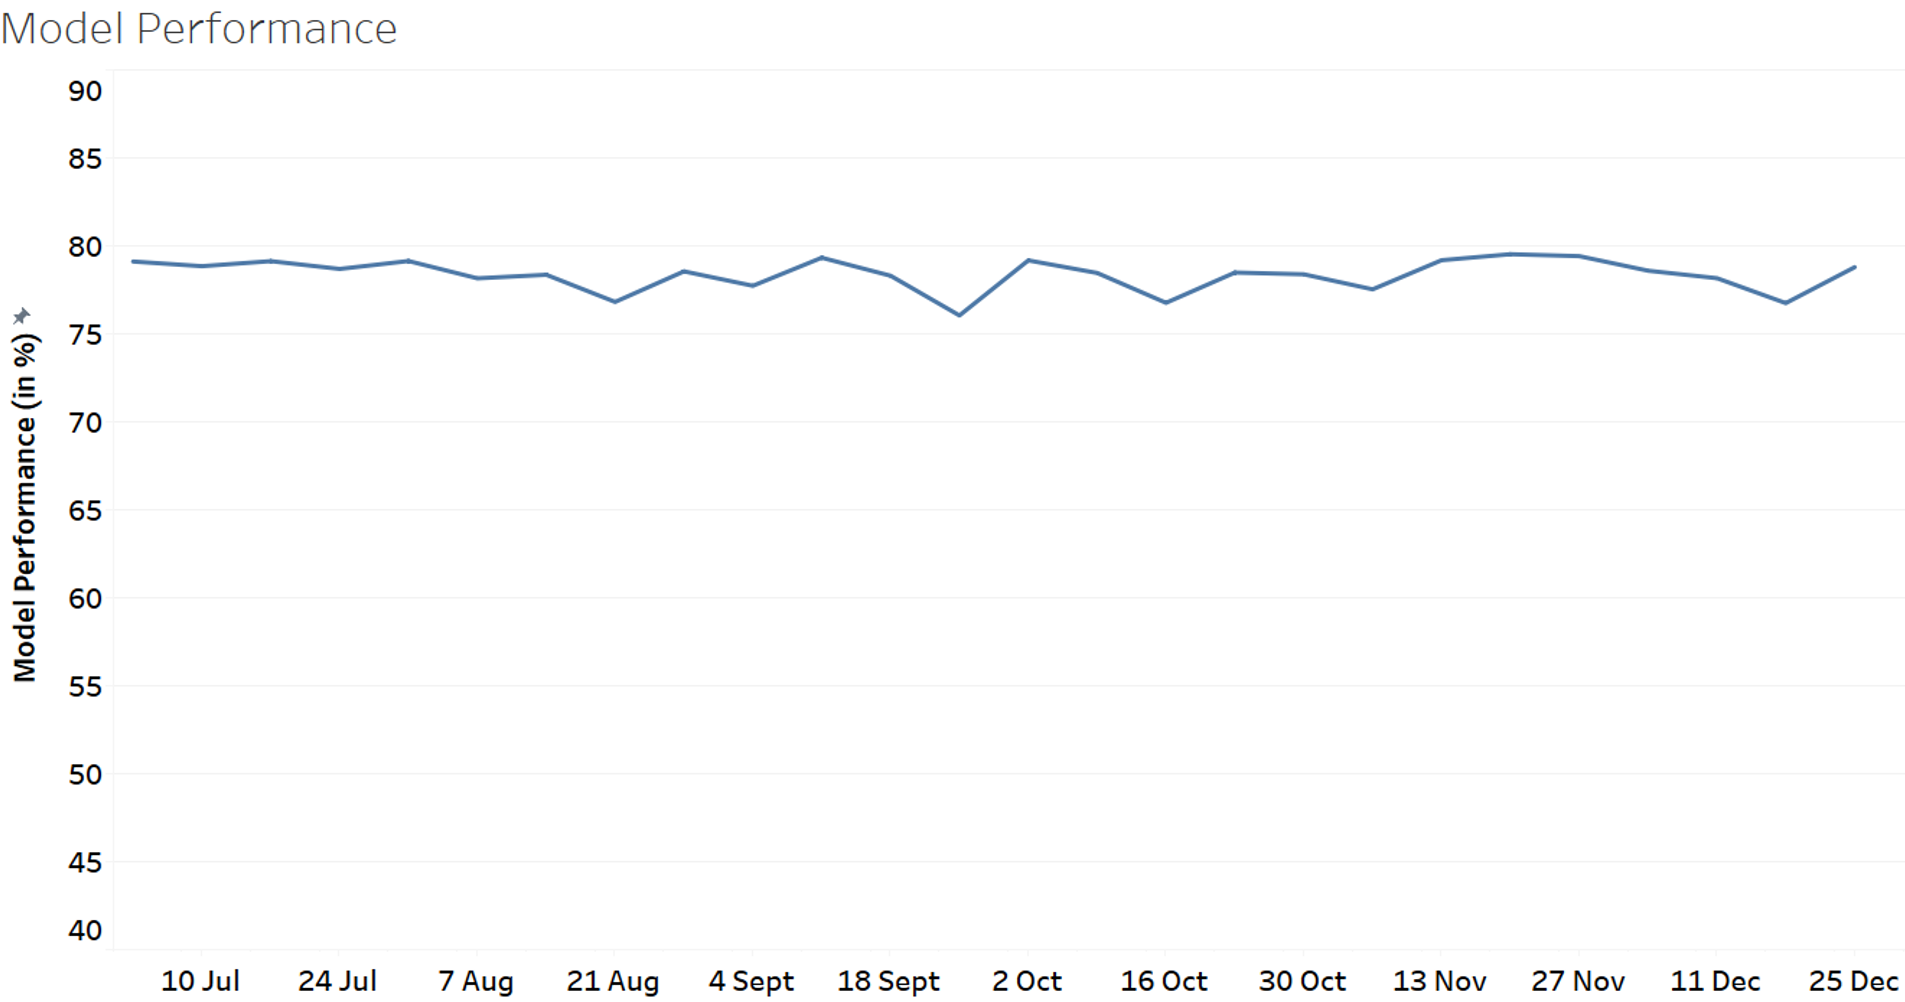

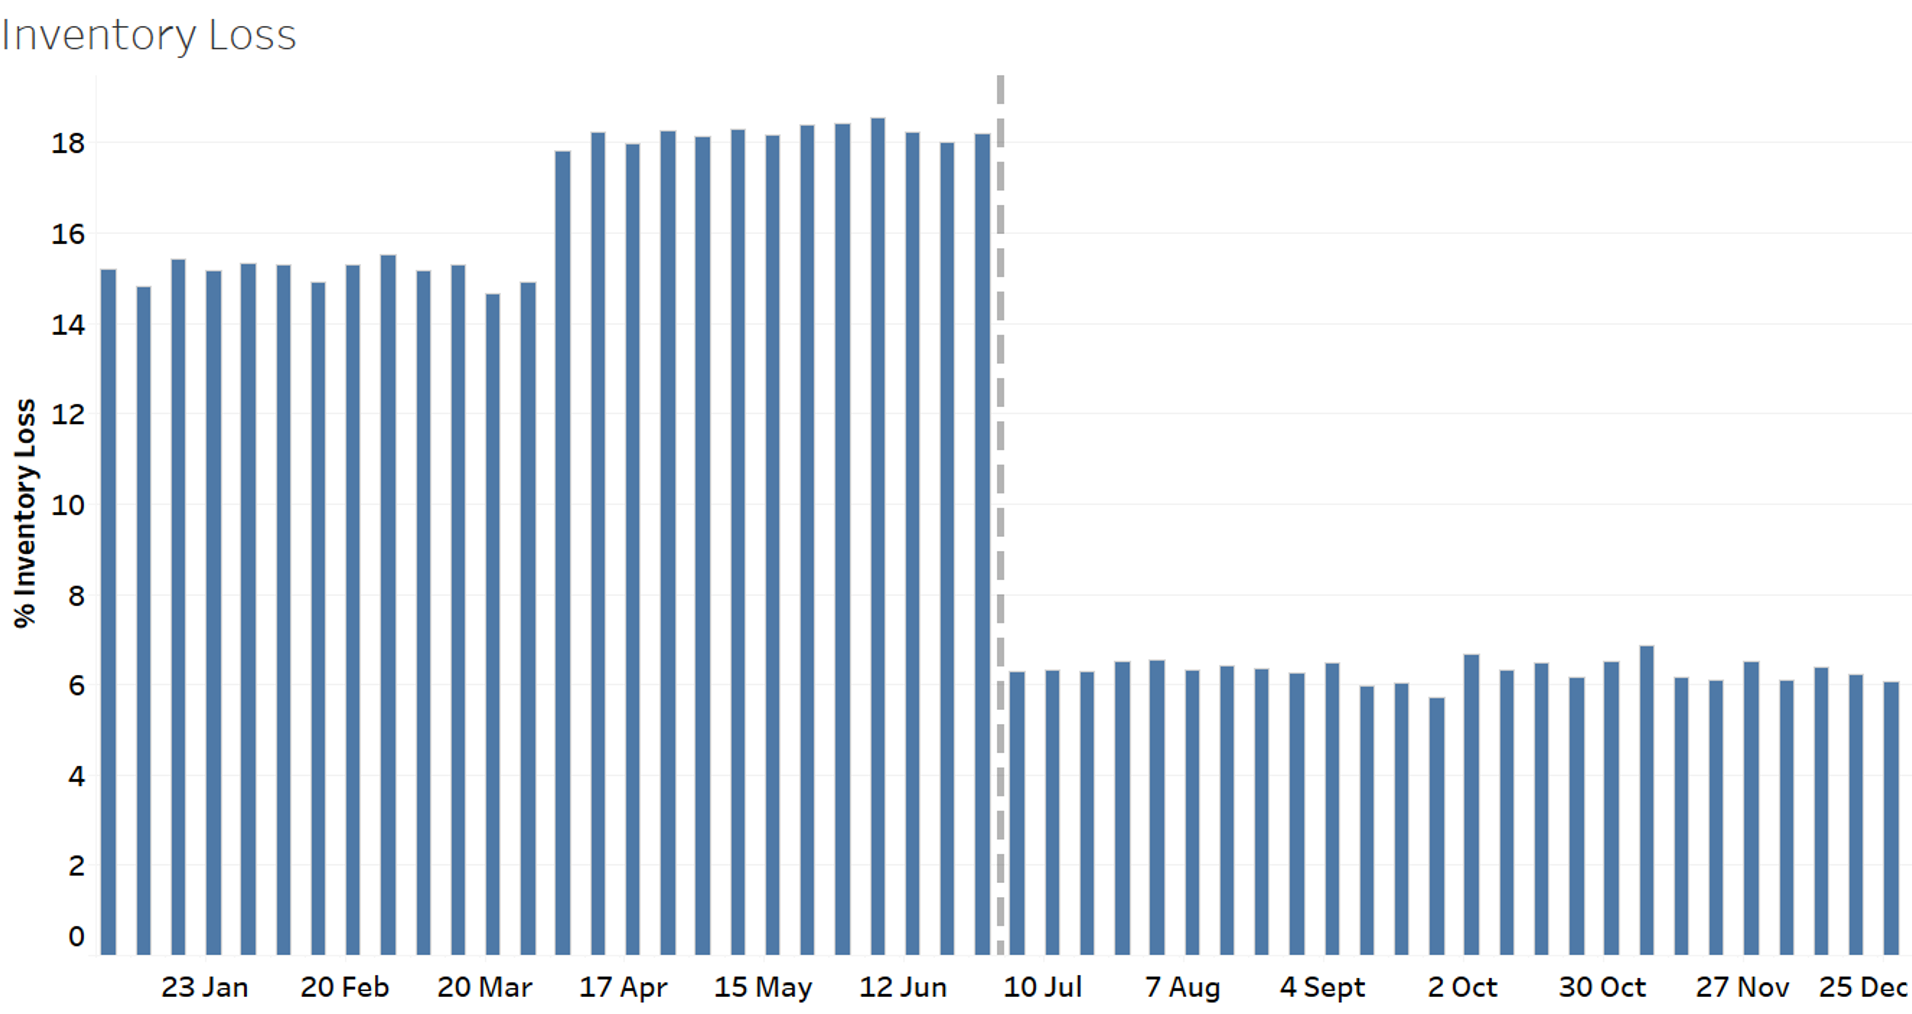

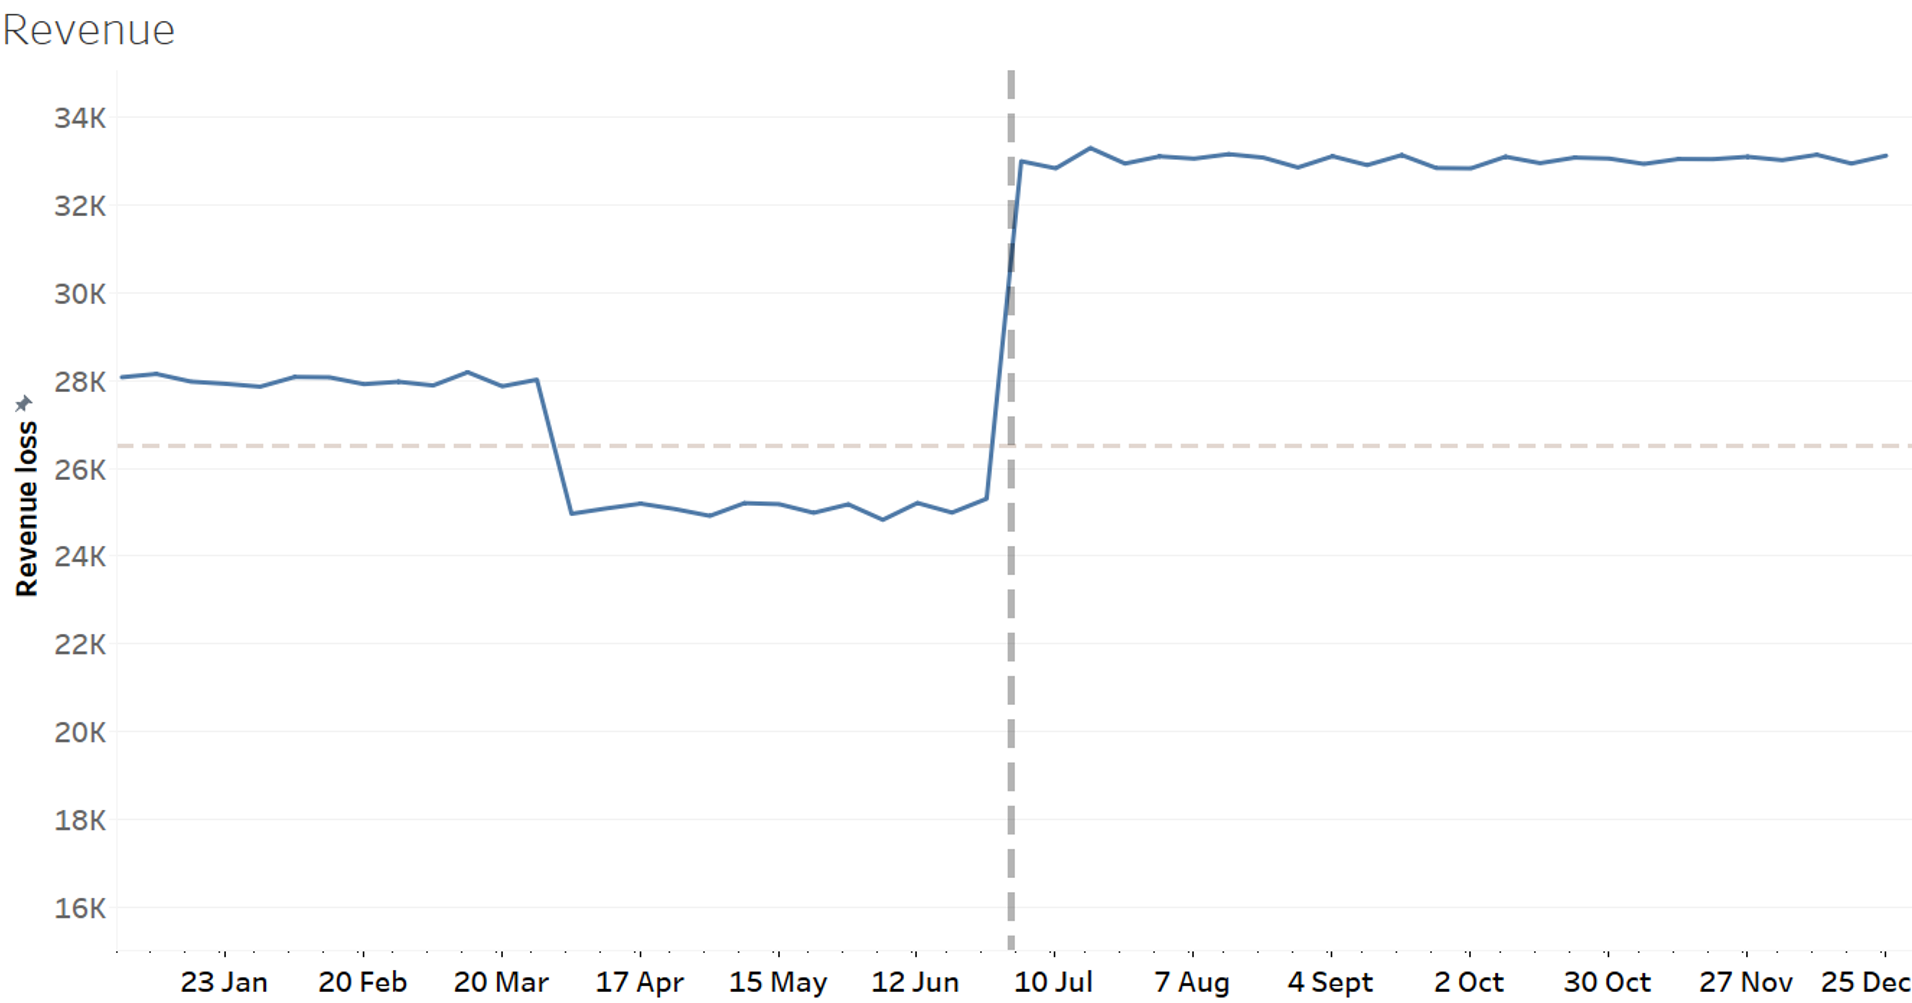

**Note**: The above charts are indicative in nature.

# **Decision Making**

**The trends of model performance along with the revenue loss incurred is useful for the Data Team.** They can use it to

- monitor the model's performance over time
- correlate it with financial numbers to gauge the  business impact
- set thresholds for the acceptable lower limit of model performance
- decide when to retrain the model

**The property manager can use the dashboard to**
- understand the current status of bookings over a date range
- identify the number of potential vacancies due to likely cancellations
- decide when to stop taking further bookings to avoid overbooking

**The leadership can use the dashboard to understand the impact of the AI solution in**
- reducing cancellations
- increasing revenue

**Let's assess the financial impact of our AI solution.**

- In the six months prior to the AI solution, the revenue stood at \$0.7 million
- Post implementation of the AI solution, the revenue over the next 6 months stood at \$0.85 million
- So, **the AI solution has helped in increase the revenue by ~21%**